<a href="https://colab.research.google.com/github/caplove/DX_team_4_repo/blob/main/Batch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **데이터 가져오기**

---



In [1]:
!git clone https://github.com/caplove/DX_team_4_repo.git

Cloning into 'DX_team_4_repo'...
remote: Enumerating objects: 284, done.
remote: Counting objects: 100% (284/284), done.
remote: Compressing objects: 100% (264/264), done.
remote: Total 284 (delta 136), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (284/284), 11.81 MiB | 5.65 MiB/s, done.
Resolving deltas: 100% (136/136), done.


In [2]:
#과제 설명
from IPython.display import Image
#Image('./image/image_01.png',width=800,height=600)

In [3]:
import sys
sys.path.append('/content/DX_team_4_repo')

## 데이터 프레임

In [4]:
"""함수 불러오기 """
from augment_import2 import augment2
from extractor_import import extractor
#from models_import import my_models
from models_import2 import my_models

from data_import import import_data_from_folder
import pandas as pd

"""시계열 데이터 import"""

FOLDER_NAME = "/DX_team_4_repo/Data"
x,y = import_data_from_folder(FOLDER_NAME)
print(x.shape,y.shape)

TEST_FOLDER_NAME = "/DX_team_4_repo/Data_test"
test_x,test_y = import_data_from_folder(TEST_FOLDER_NAME)
print(test_x.shape,test_y.shape)

""" 비어있는 데이터프레임 만들기"""
features_all = pd.DataFrame()
# jittering / MagWarp / Scaling / Combination
x_in_jittering = pd.DataFrame()
x_in_MagWarp = pd.DataFrame()
x_in_Scaling = pd.DataFrame()
x_in_Combination = pd.DataFrame()

"""전역변수"""
# global x,y,x_list

.//DX_team_4_repo/Data//suit_2.txt
.//DX_team_4_repo/Data//suit_3.txt
.//DX_team_4_repo/Data//shirt_4.txt
.//DX_team_4_repo/Data//coat_1.txt
.//DX_team_4_repo/Data//suit_4.txt
.//DX_team_4_repo/Data//suit_5.txt
.//DX_team_4_repo/Data//shirt_2.txt
.//DX_team_4_repo/Data//shirt_1.txt
.//DX_team_4_repo/Data//coat_3.txt
.//DX_team_4_repo/Data//coat_4.txt
.//DX_team_4_repo/Data//suit_1.txt
.//DX_team_4_repo/Data//idle.txt
.//DX_team_4_repo/Data//coat_5.txt
.//DX_team_4_repo/Data//shirt_5.txt
.//DX_team_4_repo/Data//shirt_3.txt
.//DX_team_4_repo/Data//coat_2.txt
(274582, 7) (274582,)
.//DX_team_4_repo/Data_test/coat_5/coat_5.txt
.//DX_team_4_repo/Data_test/suit_4/suit_4.txt
.//DX_team_4_repo/Data_test/coat_1/coat_1.txt
.//DX_team_4_repo/Data_test/coat_2/coat_2.txt
.//DX_team_4_repo/Data_test/idle/idle.txt
.//DX_team_4_repo/Data_test/shirt_2/shirt_2.txt
.//DX_team_4_repo/Data_test/shirt_3/shirt_3.txt
.//DX_team_4_repo/Data_test/coat_4/coat_4.txt
.//DX_team_4_repo/Data_test/suit_5/suit_5.txt
.

'전역변수'

In [5]:

# """변수"""
# jitter_para_list = [0.01, 0.05, 0.1]  # sigma
# MW_para_list =     [0.01, 0.05, 0.1]  # sigma
# Scale_para_list =  [0.01, 0.05, 0.1]

jitter_para_list = [0.01,0.1]  # sigma
MW_para_list =     [0.01,0.1]  # sigma
Scale_para_list =  [0.01,0.1]


external_test_data_use=1  # 별도의 test data 사용여부
log_en = 0   # 0 : 결과만 보임,  1 : 중간 과정 보임.

df = pd.DataFrame(columns=['jit','MW','Scale','DNN','MLP','DTree','KNN','AdaBoost','RandomForest'])

for i in jitter_para_list:
    for j in MW_para_list:
        for k in Scale_para_list:
            
            print(f"jitter_sigma:{i},   MW_sigma:{j},   Scale_sigma:{k}")
            # augmentation 방법별로 원본 x와 동일 size의 데이터 생성
            x_in_jittering, x_in_MagWarp, x_in_Scaling, x_in_Combination = augment2(x,y,i,j,k,log_en)
            #print(x.shape, x_in_jittering.shape, x_in_MagWarp.shape, x_in_Scaling.shape, x_in_Combination.shape, y.shape)
            print("status: 데이터 증강 완료")

            # 증강 데이터 선정
            # dataset_list = [x]                                                               # default 데이터
            dataset_list = [x,x_in_jittering, x_in_MagWarp,x_in_Scaling, x_in_Combination]   # 증강    데이터
            
            # 원본 포함 증강된 데이터의 특징 추출하고 merge            
            features_all = extractor(x,y,dataset_list,log_en)

            
            # 테스트 데이터 선정
            dataset_list = [test_x]
            #           테스트 데이터의 특징 추출하고 merge 
            features_test = extractor(test_x,test_y,dataset_list,log_en)
            print("status: Features 추출 완료")
            
            # 특징 데이터 기반 모든 모델에 대한 훈련 및 평가
            # Acc_DNN,Acc_MLP,Acc_TREE,Acc_KNN,Acc_Ensemble, Acc_RForest = my_models(features_all,log_en)
            Acc_DNN,Acc_MLP,Acc_TREE,Acc_KNN,Acc_Ensemble, Acc_RForest = my_models(features_all,log_en,external_test_data_use,features_test)   # 별도 test 폴더 적용시 1
            print("status: 모형 훈련/평가 완료")

            
            
            
            print(f"DNN: {Acc_DNN:.3f}, MLP:{Acc_MLP:.3f}, DTree:{Acc_TREE:.3f}, KNN:{Acc_KNN:.3f}, AdaBoost: {Acc_Ensemble:.3f}, RandomForest: {Acc_RForest:.3f}")
            print("----" * 30)

            # parameter별 Accuracy 데이터 저장
            df=df.append({'jit':i,'MW':j,'Scale':k,'DNN':Acc_DNN,'MLP':Acc_MLP,'DTree':Acc_TREE,'KNN':Acc_KNN,'AdaBoost':Acc_Ensemble,'RandomForest':Acc_RForest},ignore_index=True)

print(df) 


# default
# DNN: 0.940, MLP:0.902, DTree:0.759, KNN:0.940, AdaBoost: 0.714, RandomForest: 0.872  (internal test data)
# DNN: 0.521, MLP:0.490, DTree:0.510, KNN:0.578, AdaBoost: 0.260, RandomForest: 0.729  (external test data)

jitter_sigma:0.01,   MW_sigma:0.01,   Scale_sigma:0.01
status: 데이터 증강 완료
status: Features 추출 완료
status: 모형 훈련/평가 완료
DNN: 0.641, MLP:0.578, DTree:0.578, KNN:0.604, AdaBoost: 0.495, RandomForest: 0.646
------------------------------------------------------------------------------------------------------------------------
jitter_sigma:0.01,   MW_sigma:0.01,   Scale_sigma:0.1
status: 데이터 증강 완료
status: Features 추출 완료
status: 모형 훈련/평가 완료
DNN: 0.599, MLP:0.578, DTree:0.573, KNN:0.594, AdaBoost: 0.490, RandomForest: 0.698
------------------------------------------------------------------------------------------------------------------------
jitter_sigma:0.01,   MW_sigma:0.1,   Scale_sigma:0.01
status: 데이터 증강 완료
status: Features 추출 완료
status: 모형 훈련/평가 완료
DNN: 0.661, MLP:0.578, DTree:0.542, KNN:0.604, AdaBoost: 0.422, RandomForest: 0.724
------------------------------------------------------------------------------------------------------------------------
jitter_sigma:0.01,   MW_sigma:0.1,   Sc

In [6]:
""" 실험데이터 저장"""
df.to_csv("accuracy.csv", mode='a', header=True)

In [7]:
"""시각화"""
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')
import seaborn as sns
#sns.set_style("white")
import itertools
# %matplotlib inline
import pandas as pd

""" 실험데이터 불러오기"""
# df = pd.read_csv("./accuracy-org.csv",index_col=0)
df = pd.read_csv("./accuracy.csv",index_col=0)

df['avg_accuracy']=df.iloc[:,3:-1].mean(axis=1)   

# no augment 성능
# DNN: 0.940, MLP:0.902, DTree:0.759, KNN:0.940, AdaBoost: 0.714, RandomForest: 0.872

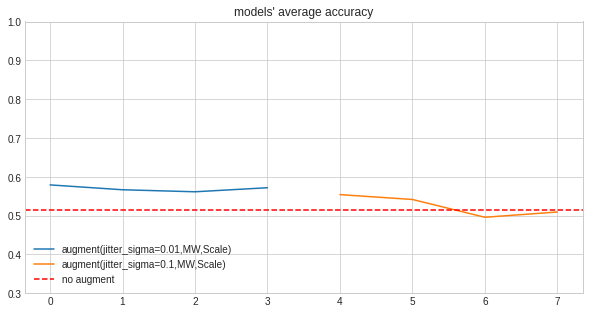

In [9]:
"""분석"""

#graph_list = [0.01, 0.05, 0.1]   # df.jit에 따른 Accuracy 비교
graph_list = [0.01, 0.1]   # df.jit에 따른 Accuracy 비교
plt.figure(figsize=(10,5))
plt.title('models\' average accuracy')

for graph_list_item in graph_list:
    
    idx = df.jit == graph_list_item
    plt.plot(df.avg_accuracy[idx],label=f'augment(jitter_sigma={graph_list_item},MW,Scale)')
    
#plt.axhline(y=0.854, color='r',linestyle = 'dashed',label='no augment')
plt.axhline(y=0.514, color='r',linestyle = 'dashed',label='no augment')
plt.ylim([0.3, 1])
plt.legend(loc='lower left')

## x,y 정의